In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Read data

In [54]:
dt=pd.read_csv('https://raw.githubusercontent.com/Programming-Systems-Lab/Capstone-2/master/data/Training_Data/Training_Dataset.csv')
dt.head()

,Package_Name,SHA256,ThumbPrint,Application_Category,Family_Name,Malware_Category,Malware/Benign,Permission: FACTORY_TEST,Permission: DUMP,Permission: BATTERY_STATS,...,pose_6dof,pressure,proximity,relative_humidity,rotation_vector,significant_motion,stationary_detect,step_counter,step_detector,temperature
0,a.com.saichedazhanjiangshi.bianz,53DCE48C4E666132A413F1C0C9D105EF7C018D7D4400E9...,F0CA270347F8E2D6D21F4F249BB6FA82AB6F83E3,NaN,NaN,NaN,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a.com.saichedazhanjiangshi.bm,D5B7A0B21A9F2893B29939FE703E5FCA6E2625B72B9435...,672C7E09D7971FEFF924CB9BB9DF501B068699D2,NaN,NaN,NaN,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,a.com.tiantianaipaoku.biafewg,9B865DB16D7052C101B075F3B3CBC923F709D101F14EA1...,2567A99F17B580AABE2846936E4CDE5D77D74115,NaN,NaN,NaN,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,a.com.tiantianaipaoku.bianzs,28388B523EB9A554F97AF745710B6A6F074F51AAEE41D2...,61ED377E85D386A8DFEE6B864BD85B0BFAA5AF81,NaN,NaN,NaN,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,advance.car.racing,DCCDDBD3268C0C922170F6C1035AFD670BA020C08012D6...,0C6F6BB008DE7BF449587AE869E463A14137944A,Racing,NaN,NaN,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dt.shape

(10954, 873)

### 2. Drop unuseful columns

#### 2.1 Drop empty columns

In [14]:
NAcols=dt.columns[dt.isnull().any()]
list(NAcols)

['Application_Category',
 'Family_Name',
 'Malware_Category',
 'sdkVersion',
 'targetSdkVersion']

In [18]:
dt[list(NAcols)].isnull().sum()

Application_Category     8592
Family_Name             10954
Malware_Category        10954
sdkVersion              10954
targetSdkVersion        10954
dtype: int64

In [42]:
droplist1=list(NAcols)[1:]

**Empty columns include:  
Family_Name, Malware_Category, sdkVersion, targetSdkVersion.  
Application_Category might be useful, so keep it for now.**

In [21]:
dt.groupby('Application_Category')['Malware/Benign'].agg(['mean', 'count'])

,mean,count
Application_Category,,
Action,5.410256,78
Adventure,7.565217,23
Arcade,6.190217,184
Art & Design,13.000000,1
Beauty,10.000000,4
Board,10.341463,41
Books & Reference,3.527778,72
Business,6.285714,35
Card,9.800000,25


#### 2.2 Check column types and remove columns whose variance is 1

In [33]:
dt.columns[dt.dtypes=='object']

Index(['Package_Name', 'SHA256', 'ThumbPrint', 'Application_Category'], dtype='object')

In [34]:
dt.columns[dt.dtypes=='float64']

Index(['Family_Name', 'Malware_Category', 'Malware/Benign', 'sdkVersion',
       'targetSdkVersion'],
      dtype='object')

In [51]:
droplist2=list(dt.iloc[:,7:].columns[dt.iloc[:,7:].var()==0])

#### 2.3 Drop high cardinality columns

In [24]:
dt['ThumbPrint'].nunique()  # drop it

3548

In [66]:
dt['Package_Name'].apply(lambda x: '.'.join(x.split('.')[:2])).nunique() # drop it

5116

In [67]:
dt['Package_Name'].apply(lambda x: '.'.join(x.split('.')[:1])).nunique() # drop it

401

#### 2.4 Get the final dataset. Shirish said we can drop the first 6 columns.

In [89]:
dt2=dt.drop(columns=droplist1+droplist2+['Package_Name','ThumbPrint','Application_Category','SHA256','label'])
dt2['Malware/Benign']=dt2['Malware/Benign'].apply(lambda x: 1 if x>0 else 0)

In [90]:
dt2.head()

,Malware/Benign,Permission: FACTORY_TEST,Permission: DUMP,Permission: BATTERY_STATS,Permission: BIND_WALLPAPER,Permission: BIND_INPUT_METHOD,Permission: READ_LOGS,Permission: INSTALL_LOCATION_PROVIDER,Permission: READ_FRAME_BUFFER,Permission: SET_PROCESS_LIMIT,...,pose_6dof,pressure,proximity,relative_humidity,rotation_vector,significant_motion,stationary_detect,step_counter,step_detector,temperature
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Modeling

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support

#### 3.1 Train test split

In [91]:
X,y=dt2.drop(columns=['Malware/Benign']), dt2['Malware/Benign']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 123, 
                                                    stratify = y)

#### 3.2 Train different models

In [117]:
### logistic
scores = cross_validate(LogisticRegression(max_iter = 1000), X_train, y_train, scoring=('roc_auc','accuracy'),cv=5)
print('Cross-Validation Accuracy Score', scores['test_accuracy'].mean())
print('Cross-Validation AUC Score', scores['test_roc_auc'].mean())

Cross-Validation Accuracy Score 0.8888495130331044
Cross-Validation AUC Score 0.8966494477841283


In [118]:
### svm
scores = cross_validate(SVC(), X_train, y_train, scoring=('roc_auc','accuracy'),cv=5)
print('Cross-Validation Accuracy Score', scores['test_accuracy'].mean())
print('Cross-Validation AUC Score', scores['test_roc_auc'].mean())

Cross-Validation Accuracy Score 0.8984358842115409
Cross-Validation AUC Score 0.8971902922452207


In [119]:
### knn
scores = cross_validate(KNeighborsClassifier(), X_train, y_train, scoring=('roc_auc','accuracy'),cv=5)
print('Cross-Validation Accuracy Score', scores['test_accuracy'].mean())
print('Cross-Validation AUC Score', scores['test_roc_auc'].mean())

Cross-Validation Accuracy Score 0.8885072426394934
Cross-Validation AUC Score 0.8997169858208374


In [120]:
### xgboost
scores = cross_validate(XGBClassifier(), X_train, y_train, scoring=('roc_auc','accuracy'),cv=5)
print('Cross-Validation Accuracy Score', scores['test_accuracy'].mean())
print('Cross-Validation AUC Score', scores['test_roc_auc'].mean())

Cross-Validation Accuracy Score 0.9002610658310475
Cross-Validation AUC Score 0.9379047107023799


**train and test using xgboost**

In [130]:
model=XGBClassifier()
model.fit(X_train,y_train)
y_pred_prob=model.predict_proba(X_test)
y_pred=model.predict(X_test)

In [147]:
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print('Test AUC:', roc_auc_score(y_test, y_pred_prob[:,1]))

Test Accuracy: 0.8895481515289821
Test AUC: 0.9379519079396481


In [101]:
confusion_matrix(y_test,y_pred)

array([[ 237,  164],
       [  78, 1712]])

In [103]:
# Compute precision, recall, F-measure and support for each class
precision_recall_fscore_support(y_test,y_pred)

(array([0.75238095, 0.91257996]),
 array([0.59102244, 0.95642458]),
 array([0.66201117, 0.933988  ]),
 array([ 401, 1790]))

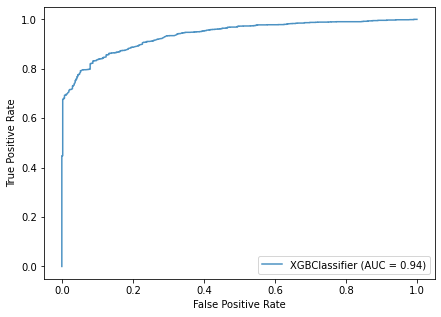

In [157]:
plt.figure(figsize=(7,5))
ax=plt.gca()
plot_roc_curve(model, X_test, y_test, ax=ax,alpha=0.8)
plt.show()